In [2]:
using ModelingToolkit, Sophon, DomainSets
using Optimization, OptimizationOptimJL

@parameters t, x
@variables u(..)
Dt = Differential(t)
Dx = Differential(x)
Dxx = Differential(x)^2

eq = Dt(u(t, x)) + u(t, x) * Dx(u(t, x)) - (0.01 / pi) * Dxx(u(t, x)) ~ 0

bcs = [u(0, x) ~ -sinpi(x),
    u(t, -1) ~ 0.0,
    u(t, 1) ~ 0.0,
    u(t, -1) ~ u(t, 1)]

domains = [t ∈ Interval(0.0, 1.0),
    x ∈ Interval(-1.0, 1.0)]

@named pde_system = PDESystem(eq, bcs, domains, [t,x], [u(t,x)])

PDESystem
Equations: Equation[Differential(x)(u(t, x))*u(t, x) + Differential(t)(u(t, x)) - 0.003183098861837907Differential(x)(Differential(x)(u(t, x))) ~ 0]
Boundary Conditions: Equation[u(0, x) ~ -sin(πx), u(t, -1) ~ 0.0, u(t, 1) ~ 0.0, u(t, -1) ~ u(t, 1)]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(t, 0.0..1.0), Symbolics.VarDomainPairing(x, -1.0..1.0)]
Dependent Variables: Num[u(t, x)]
Independent Variables: Num[t, x]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [3]:
chain = FullyConnected(2, 1, tanh; hidden_dims=16, num_layers=5)
pinn = PINN(chain)
sampler = QuasiRandomSampler(2000, 200)
strategy = NonAdaptiveTraining(1, 10)
prob = Sophon.discretize(pde_system, pinn, sampler, strategy)

OptimizationProblem. In-place: true
u0: ComponentVector{Float64}(layer_1 = (weight = [1.4085174798965454 -1.2121944427490234; 0.561835527420044 0.010327864438295364; … ; 1.5105738639831543 0.32148462533950806; -0.18251360952854156 -1.4970661401748657], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_2 = (weight = [-0.6359860301017761 -0.16188956797122955 … 0.7107234597206116 0.25357943773269653; -0.6248577237129211 -0.23924891650676727 … -0.5615225434303284 -0.6095168590545654; … ; -0.5393600463867188 -0.21284866333007812 … -0.3618816137313843 0.661764919757843; -0.4682725965976715 0.4008866548538208 … -0.38184109330177307 0.6430938839912415], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_3 = (weight = [-0.2984274923801422 -0.24326109886169434 … -0.7198391556739807 -0.5293235182762146; -0.17448660731315613 -0.16890020668506622 … 0.30691471695899963 -0.6967571377754211; … ; -0.002482192125171423 -0.649617612361908 … 0.2237975001335144 0.17741917073726654; 0.4629054069519043 -0.36202192306518555 …

In [4]:
function callback(p, l)
    println("Loss: $l")
    return false
end

res = Optimization.solve(prob, BFGS(); maxiters=1000, callback=callback)

Loss: 163.82734408943207


Loss: 13.80560961790478


Loss: 6.050243297090767


Loss: 3.7182912263522883


Loss: 3.4107378138862803


Loss: 2.9067889676474863


Loss: 2.260611305942964


Loss: 2.0300274472830315


Loss: 1.683001642041339


Loss: 1.4567418662939136


Loss: 1.2505451874433766


Loss: 1.1025956343006411


Loss: 0.9616940536399788


Loss: 0.8900018168647896


Loss: 0.8319026691618407


Loss: 0.6278702502351596


Loss: 0.5889240139384707


Loss: 0.54298108631067


Loss: 0.49534219016043923


Loss: 0.45190478575641163


Loss: 0.40060342784348674


Loss: 0.3849137597444843


Loss: 0.3659956788421595


Loss: 0.34936411799614014


Loss: 0.33181618193318557


Loss: 0.31759332284216435


Loss: 0.3094785845921181


Loss: 0.29889038305737037


Loss: 0.2818015361834182


Loss: 0.27839245371472143


Loss: 0.2713217590846157


Loss: 0.2674265378652594


Loss: 0.26452192893432747


Loss: 0.2599067191549149


Loss: 0.2572533477315512


Loss: 0.25478207900363625


Loss: 0.2506389199576934


Loss: 0.24646776244631022


Loss: 0.24215614989900716


Loss: 0.23879881808741285


Loss: 0.23530689158951407


Loss: 0.23402272471126093


Loss: 0.23333551420270265


Loss: 0.2308628334968291


Loss: 0.22871437882749499


Loss: 0.22321625108199206


Loss: 0.22211538392654187


Loss: 0.22113611445603926


Loss: 0.21851333220795036


Loss: 0.21530529179608462


Loss: 0.21438162406281433


Loss: 0.2128404045354458


Loss: 0.2108654367791389


Loss: 0.21038626046375036


Loss: 0.2087329326736967


Loss: 0.20715311335704306


Loss: 0.20528117055475084


Loss: 0.20322996084889255


Loss: 0.19945031382252348


Loss: 0.19877782971470107


Loss: 0.19716787134190042


Loss: 0.19451005384766865


Loss: 0.1932352498064531


Loss: 0.19040631772854788


Loss: 0.18905574132378192


Loss: 0.1867242071444215


Loss: 0.1833882559711818


Loss: 0.1790246335953862


Loss: 0.17564517756611825


Loss: 0.17100023390719427


Loss: 0.16722224852432876


Loss: 0.1619733061091422


Loss: 0.1578003479298561


Loss: 0.15401120554080253


Loss: 0.15058149460269943


Loss: 0.1450638443927457


Loss: 0.1393310789267214


Loss: 0.13531726392969018


Loss: 0.13203789879933445


Loss: 0.1253077075725698


Loss: 0.1184622724236613


Loss: 0.11259129060444997


Loss: 0.1097868859245903


Loss: 0.10505080077179671


Loss: 0.10240096820645317


Loss: 0.09602213131310448


Loss: 0.09150166602185796


Loss: 0.09023540532878072


Loss: 0.08735998300195622


Loss: 0.08163946812730086


Loss: 0.07681762103176556


Loss: 0.07534610870490764


Loss: 0.07222041054447867


Loss: 0.0692309562039907


Loss: 0.06567244327061293


Loss: 0.06320438129090607


Loss: 0.06135314364976357


Loss: 0.05969593890317512


Loss: 0.05812256978481913


Loss: 0.05680502731845354


Loss: 0.05488928362497794


Loss: 0.053259328741349324


Loss: 0.05250417374100739


Loss: 0.05011774841678275


Loss: 0.04829377258380043


Loss: 0.047738300790445554


Loss: 0.04677624088318127


Loss: 0.044718890544059885


Loss: 0.04421916618817443


Loss: 0.04294564049825014


Loss: 0.04117449017863516


Loss: 0.03927305389970137


Loss: 0.03762067044762301


Loss: 0.036444724054989615


Loss: 0.03574365181126834


Loss: 0.03445473151033725


Loss: 0.03380533945561209


Loss: 0.03222281107172739


Loss: 0.030697206841376248


Loss: 0.029830804333470837


Loss: 0.029009229006844862


Loss: 0.027344360141708927


Loss: 0.025974107208772877


Loss: 0.024184154024529975


Loss: 0.023295222967276742


Loss: 0.02304799939534561


Loss: 0.022356123934509295


Loss: 0.021455084619373642


Loss: 0.020367107856872683


Loss: 0.019577320972882842


Loss: 0.018673383903954788


Loss: 0.01806254455282845


Loss: 0.017586096537824884


Loss: 0.01720538955641042


Loss: 0.016720143575091346


Loss: 0.016357796983263517


Loss: 0.01597535181664845


Loss: 0.015593706042532973


Loss: 0.015156575562051041


Loss: 0.014859312571794321


Loss: 0.014386109250656233


Loss: 0.013999899529226187


Loss: 0.013762315630004839


Loss: 0.013350806357334153


Loss: 0.013151293918202337


Loss: 0.012768809129778269


Loss: 0.01255308293270863


Loss: 0.012302945054549928


Loss: 0.011990728982291548


Loss: 0.011648923981662763


Loss: 0.011228433924233831


Loss: 0.010952724523534808


Loss: 0.010855151716697415


Loss: 0.010608308358842126


Loss: 0.010336686484231876


Loss: 0.010107177730725517


Loss: 0.009864354054121328


Loss: 0.009656973753765303


Loss: 0.009386509375003817


Loss: 0.008996924149091206


Loss: 0.008668139122472909


Loss: 0.008483028781786974


Loss: 0.008290339967345144


Loss: 0.008095447567117057


Loss: 0.007881747222556853


Loss: 0.007699084933803252


Loss: 0.007542818725836027


Loss: 0.007419428384738251


Loss: 0.007319578417158974


Loss: 0.007208927628553758


Loss: 0.007042217980203913


Loss: 0.006868124972829187


Loss: 0.006676361365186305


Loss: 0.006580402749375878


Loss: 0.00643673927996973


Loss: 0.006299618071807469


Loss: 0.0061398185228776206


Loss: 0.006028549762706857


Loss: 0.005860646193704034


Loss: 0.005755149231461103


Loss: 0.00565492273534064


Loss: 0.005549605946857375


Loss: 0.0054075862247734965


Loss: 0.005280581422809917


Loss: 0.00518013049821675


Loss: 0.005019870429981876


Loss: 0.004895238445074896


Loss: 0.004770691945488823


Loss: 0.004688589996502862


Loss: 0.0045822501801304


Loss: 0.004491067967214662


Loss: 0.004410087430912327


Loss: 0.004324277389442903


Loss: 0.004216746745537235


Loss: 0.004115580837363336


Loss: 0.0040253440011087434


Loss: 0.003947446750327285


Loss: 0.003860928497269775


Loss: 0.003802320941959081


Loss: 0.003715357908783376


Loss: 0.0036626776104274313


Loss: 0.0035507327647874122


Loss: 0.003458441725959487


Loss: 0.0033615234431541192


Loss: 0.003286679083568188


Loss: 0.0032135182206837285


Loss: 0.003146698629925151


Loss: 0.0031005551439035415


Loss: 0.003044527592339263


Loss: 0.00296191923999728


Loss: 0.0028821841071019487


Loss: 0.0027743406700698817


Loss: 0.002666662257857422


Loss: 0.002576580268066491


Loss: 0.0025229497802457344


Loss: 0.002475730927388995


Loss: 0.002398800467810254


Loss: 0.002338250416614323


Loss: 0.002234988289308158


Loss: 0.0021727242914555763


Loss: 0.002141461052938645


Loss: 0.002113470969423294


Loss: 0.0020695301396135004


Loss: 0.002034967475133544


Loss: 0.0020001227924127973


Loss: 0.0019659011113110987


Loss: 0.001936221287868886
Loss: 0.0019125049133968213


Loss: 0.0018884142948181058


Loss: 0.0018634364936902883


Loss: 0.0018265847531767222


Loss: 0.001797323270930252


Loss: 0.0017701395352558507


Loss: 0.001753112628149664


Loss: 0.0017274714733098513


Loss: 0.001703684960873523


Loss: 0.001689067843085022


Loss: 0.0016654381896186136


Loss: 0.0016422881835597715


Loss: 0.001612225586907985


Loss: 0.0015768970354541661


Loss: 0.001539996985888037


Loss: 0.0015153150227897906


Loss: 0.0014993956526673541


Loss: 0.001477574730757739


Loss: 0.0014568511570957762


Loss: 0.001442884936534752


Loss: 0.0014262875258449735


Loss: 0.0014115214532975792


Loss: 0.0013916659715757635


Loss: 0.001366154414602204


Loss: 0.0013506688988593162


Loss: 0.0013351550452644037


Loss: 0.0013262097887273444


Loss: 0.0013160318781610591


Loss: 0.0012943641994766898


Loss: 0.0012736278359119372


Loss: 0.0012485247987754503


Loss: 0.001228282263990597


Loss: 0.0012044746466129545


Loss: 0.0011905489634486464


Loss: 0.0011741371563802308


Loss: 0.0011571508220395393


Loss: 0.0011395917891238083


Loss: 0.0011246250781506986


Loss: 0.0011054938625484798


Loss: 0.0010851795275915153


Loss: 0.0010625422658483907


Loss: 0.001048710660417733


Loss: 0.0010359064773463207


Loss: 0.0010225408779743483


Loss: 0.0010077843295841669


Loss: 0.0009909952565406298


Loss: 0.000976188774352587


Loss: 0.0009579369011816356


Loss: 0.0009447286165661056


Loss: 0.0009274138954095308


Loss: 0.0009156340008515924


Loss: 0.0009031765877493734


Loss: 0.000889722410881948


Loss: 0.0008721075359393447


Loss: 0.0008536602647116928


Loss: 0.0008396504750266231


Loss: 0.000825323514415719


Loss: 0.0008113120597007819


Loss: 0.0007959528050804734


Loss: 0.0007726070641750903


Loss: 0.0007588107449083834


Loss: 0.0007459971810023966


Loss: 0.0007345558704698294


Loss: 0.0007244660751331394


Loss: 0.0007153768424146464


Loss: 0.000705323272764291


Loss: 0.00069807270328079


Loss: 0.0006869344767681229


Loss: 0.000673733382308947


Loss: 0.0006558962506681306


Loss: 0.000638683086354419


Loss: 0.0006258834700510553


Loss: 0.000616424126597009


Loss: 0.0006077375309413847


Loss: 0.0005942814948408663


Loss: 0.0005846641631170355


Loss: 0.0005748967219729055


Loss: 0.0005648167676154611


Loss: 0.0005579604712765291


Loss: 0.0005475194722521216


Loss: 0.0005404539167142413


Loss: 0.0005333007844999994


Loss: 0.000519986013603342


Loss: 0.0005094816542947019


Loss: 0.0005002066630811252


Loss: 0.0004865385317104901


Loss: 0.000477600721624687


Loss: 0.00046761666125308936


Loss: 0.00046057793235694


Loss: 0.0004517144883180485


Loss: 0.0004422458000050761


Loss: 0.00043668179966419203


Loss: 0.0004305458344670148


Loss: 0.0004241973289653238


Loss: 0.0004154204429566076


Loss: 0.00040326468120351094


Loss: 0.000393880383886379


Loss: 0.00038879378345514366


Loss: 0.0003839803257805475


Loss: 0.0003807135599193256


Loss: 0.0003755961932960909


Loss: 0.00037078740583928175


Loss: 0.0003663534274714817


Loss: 0.0003622590296614063


Loss: 0.0003572180691397437


Loss: 0.00035175092917838784


Loss: 0.0003455330684728416


Loss: 0.00033710637073217455


Loss: 0.00032938938840721077


Loss: 0.0003215985428358056


Loss: 0.00031504065065183926


Loss: 0.0003095637572857428


Loss: 0.00030339581757440453


Loss: 0.0002971863236373015


Loss: 0.00029200014737028877


Loss: 0.0002862641112370742


Loss: 0.0002815245058628112


Loss: 0.0002772124671537662


Loss: 0.0002733673072151475


Loss: 0.00026916401772476584


Loss: 0.0002657234773536565


Loss: 0.0002628221284972203


Loss: 0.0002593307759712727


Loss: 0.0002557874317552414


Loss: 0.00025003535644015936


Loss: 0.00024313398107461486


Loss: 0.00023773813072989239


Loss: 0.0002335215476724046


Loss: 0.0002292680657393721


Loss: 0.00022487285614432705


Loss: 0.00021997554199784284


Loss: 0.00021679362868063748


Loss: 0.00021214034203773197


Loss: 0.00020744988865906434


Loss: 0.0002029616371445342


Loss: 0.00019872018919356787


Loss: 0.0001958619407223128


Loss: 0.00019341006003154712


Loss: 0.00019037694405550596


Loss: 0.00018812665639496805


Loss: 0.00018588253525553952


Loss: 0.00018367874740954324


Loss: 0.00018165083214690853


Loss: 0.00017849200715209205


Loss: 0.00017593220479102152


Loss: 0.00017345750349828895


Loss: 0.00017146651822123773


Loss: 0.00016930942846853428


Loss: 0.00016727685603997892


Loss: 0.00016518537052622698


Loss: 0.000162920677253224


Loss: 0.00016077789715269328


Loss: 0.0001583384171195617


Loss: 0.00015634628346710523


Loss: 0.0001536203924480561


Loss: 0.00015114234482596785


Loss: 0.00014906082808381873


Loss: 0.00014677127425766751


Loss: 0.00014454100952359425


Loss: 0.00014277759204032106


Loss: 0.00014100181947856454


Loss: 0.00013900436720437026


Loss: 0.0001374676045751831


Loss: 0.00013557320977593656


Loss: 0.00013316884187847492


Loss: 0.00013076895385523928


Loss: 0.00012849931193349343


Loss: 0.00012602360973836498


Loss: 0.00012267936225861888


Loss: 0.0001200977007286368


Loss: 0.00011771884647688029


Loss: 0.00011558854380505508


Loss: 0.00011369216029427786


Loss: 0.00011170588729421686


Loss: 0.00010989058364689436


Loss: 0.00010804314755027577


Loss: 0.00010608297431344015


Loss: 0.00010378999969988706


Loss: 0.00010136173580687265


Loss: 9.931617556406408e-5


Loss: 9.777696925412223e-5


Loss: 9.678362976866026e-5


Loss: 9.571606383176239e-5


Loss: 9.458428514061377e-5


Loss: 9.293914811455058e-5


Loss: 9.131354377820093e-5


Loss: 9.004206153441494e-5


Loss: 8.870531296721729e-5


Loss: 8.72323524770553e-5


Loss: 8.468872300930062e-5


Loss: 8.250990643980264e-5


Loss: 8.068875472575224e-5


Loss: 7.936588231259391e-5


Loss: 7.815538320541297e-5


Loss: 7.649845510471142e-5


Loss: 7.52039958909081e-5


Loss: 7.436842719265108e-5


Loss: 7.376335476408004e-5


Loss: 7.298472301370578e-5


Loss: 7.198769951125667e-5


Loss: 7.106188365133651e-5


Loss: 6.957957949947314e-5


Loss: 6.834127407340671e-5


Loss: 6.756663528478543e-5


Loss: 6.704680243027641e-5


Loss: 6.63060358157123e-5


Loss: 6.566586316333467e-5


Loss: 6.470414815923378e-5


Loss: 6.323331729016366e-5


Loss: 6.218757296357748e-5


Loss: 6.134712768125791e-5


Loss: 6.0778261728319864e-5


Loss: 5.9931293905212226e-5


Loss: 5.8970808561966086e-5


Loss: 5.7835720461810725e-5


Loss: 5.644973634870038e-5


Loss: 5.534423659869637e-5


Loss: 5.443105420649429e-5


Loss: 5.3818414688992386e-5


Loss: 5.320826492520741e-5


Loss: 5.2574331035161206e-5


Loss: 5.1998826216508064e-5


Loss: 5.133937132408649e-5


Loss: 5.0733347806288155e-5


Loss: 5.008034185437654e-5


Loss: 4.9560989732576264e-5


Loss: 4.902782468322815e-5


Loss: 4.852736357978925e-5


Loss: 4.803484134557861e-5


Loss: 4.7588729336761624e-5


Loss: 4.701750403736237e-5


Loss: 4.6395082446322446e-5


Loss: 4.590525697071507e-5


Loss: 4.540265693001488e-5


Loss: 4.461790599387176e-5


Loss: 4.394467066540785e-5


Loss: 4.341335233233492e-5


Loss: 4.293428775669761e-5


Loss: 4.253453644977717e-5


Loss: 4.1984367805962875e-5


Loss: 4.158131851549916e-5


Loss: 4.1041189664299906e-5


Loss: 4.0485453434053986e-5


Loss: 4.005912915432235e-5


Loss: 3.9665877644378424e-5


Loss: 3.9297377980145345e-5


Loss: 3.882734916851803e-5


Loss: 3.8399479621997936e-5


Loss: 3.801904901836518e-5


Loss: 3.7530400722175536e-5


Loss: 3.7079569980320126e-5


Loss: 3.6492906849712784e-5


Loss: 3.600798064468133e-5


Loss: 3.551712629017645e-5


Loss: 3.509597583657596e-5


Loss: 3.457721204347582e-5


Loss: 3.416447819342983e-5


Loss: 3.389371580143068e-5


Loss: 3.3686198098045884e-5


Loss: 3.350222615472861e-5


Loss: 3.3207723662042754e-5


Loss: 3.288067277299427e-5


Loss: 3.25653256263383e-5


Loss: 3.208736643502158e-5


Loss: 3.1645523487066533e-5


Loss: 3.121733217338987e-5


Loss: 3.093346300990137e-5


Loss: 3.0666209175869924e-5


Loss: 3.031179524897932e-5


Loss: 2.983270788771256e-5


Loss: 2.9437251665559624e-5


Loss: 2.9148847483562934e-5


Loss: 2.8930392904695394e-5


Loss: 2.8757887545767864e-5


Loss: 2.8543952806868754e-5


Loss: 2.8377345367213377e-5


Loss: 2.8243912221174447e-5


Loss: 2.8086204747111452e-5


Loss: 2.789281546084555e-5


Loss: 2.7575388742348305e-5


Loss: 2.7197914212337175e-5


Loss: 2.6928249769419313e-5


Loss: 2.669363238139335e-5


Loss: 2.638741116269956e-5


Loss: 2.596615258767611e-5


Loss: 2.5556696548964646e-5


Loss: 2.525979682490651e-5


Loss: 2.5019447716566422e-5


Loss: 2.4808061735698216e-5


Loss: 2.464620991854061e-5


Loss: 2.452262891455799e-5


Loss: 2.4359239043253086e-5


Loss: 2.4115787426750013e-5


Loss: 2.3825811167086493e-5


Loss: 2.357667845464857e-5


Loss: 2.337792015403703e-5


Loss: 2.324426817407182e-5


Loss: 2.3067406812250486e-5


Loss: 2.284706901611409e-5


Loss: 2.2646798052813473e-5


Loss: 2.2437542385787544e-5


Loss: 2.2169307544611357e-5


Loss: 2.197891869665098e-5


Loss: 2.18480933372952e-5


Loss: 2.1759584525705354e-5


Loss: 2.1646391689611256e-5


Loss: 2.1496097473251732e-5


Loss: 2.126682374051267e-5


Loss: 2.0975101842893844e-5


Loss: 2.0743479103489342e-5


Loss: 2.0613614907956145e-5


Loss: 2.0525847852237956e-5


Loss: 2.0451679561337166e-5


Loss: 2.0346353700108717e-5


Loss: 2.0141066211426247e-5


Loss: 1.9992506158652122e-5


Loss: 1.9824023343754188e-5


Loss: 1.9675847599094963e-5


Loss: 1.9552816825097078e-5


Loss: 1.9383758847778483e-5


Loss: 1.9194746236605688e-5


Loss: 1.9002960962110425e-5


Loss: 1.8759494303665827e-5


Loss: 1.861920441285836e-5


Loss: 1.85013761700795e-5


Loss: 1.8410169514042636e-5


Loss: 1.8336700573801274e-5


Loss: 1.8246383105794526e-5


Loss: 1.8174807254174784e-5


Loss: 1.8071606324785122e-5


Loss: 1.7911109802867162e-5


Loss: 1.7764902350302834e-5


Loss: 1.76540197883731e-5


Loss: 1.750980291019347e-5


Loss: 1.7352065299365866e-5


Loss: 1.721194268989082e-5


Loss: 1.702583041178556e-5


Loss: 1.6878810880991812e-5


Loss: 1.6728563862572624e-5


Loss: 1.6597350923575508e-5


Loss: 1.6487031510569527e-5


Loss: 1.639555864003171e-5


Loss: 1.6317513730415274e-5


Loss: 1.6231691116748524e-5


Loss: 1.6128969568380784e-5


Loss: 1.6002487961996497e-5


Loss: 1.5887431256160268e-5


Loss: 1.573425523711013e-5


Loss: 1.5568760258021733e-5


Loss: 1.540812243672929e-5


Loss: 1.5315565360852445e-5


Loss: 1.5237563999363957e-5


Loss: 1.5166249125733425e-5


Loss: 1.5095020495203388e-5


Loss: 1.5016637190034746e-5


Loss: 1.49167632182163e-5


Loss: 1.4811319200385136e-5


Loss: 1.4719697385144117e-5


Loss: 1.4582701779481234e-5


Loss: 1.4409407660836907e-5


Loss: 1.428384065109687e-5


Loss: 1.4222089656945668e-5


Loss: 1.4156972051341423e-5


Loss: 1.4093381050745182e-5


Loss: 1.4025042245247182e-5


Loss: 1.3938942822795133e-5


Loss: 1.3853348920863161e-5


Loss: 1.3799700598091242e-5


Loss: 1.3748631352843865e-5


Loss: 1.3679098567908358e-5


Loss: 1.3595306885550344e-5


Loss: 1.3488441803374084e-5


Loss: 1.340752453281694e-5


Loss: 1.334393632439613e-5


Loss: 1.326966916227259e-5


Loss: 1.3193269028893634e-5


Loss: 1.3140547427368726e-5


Loss: 1.3097584517244877e-5


Loss: 1.3045464611987585e-5


Loss: 1.2982697779824495e-5


Loss: 1.2915320025909082e-5


Loss: 1.284229427984932e-5


Loss: 1.2796922979383246e-5


Loss: 1.276345495625935e-5


Loss: 1.2718332358226943e-5


Loss: 1.263949421643611e-5


Loss: 1.2559607473935263e-5


Loss: 1.2469685655318304e-5


Loss: 1.2366129719471906e-5


Loss: 1.2287853011569373e-5


Loss: 1.224553671805901e-5


Loss: 1.2211260849319242e-5


Loss: 1.2173875137530163e-5


Loss: 1.2115472083734556e-5


Loss: 1.2024405626279647e-5


Loss: 1.1905548383349288e-5


Loss: 1.1834344440054748e-5


Loss: 1.1793098618380122e-5


Loss: 1.1760148938957875e-5


Loss: 1.1724570872729629e-5


Loss: 1.166185714635119e-5


Loss: 1.157225975272094e-5


Loss: 1.1450970853518539e-5


Loss: 1.134903623103807e-5


Loss: 1.1300971910437556e-5


Loss: 1.1270651082212828e-5


Loss: 1.1246011177627361e-5


Loss: 1.1226752338128813e-5


Loss: 1.1191115901067726e-5


Loss: 1.109995467614227e-5


Loss: 1.0985693999760517e-5


Loss: 1.0916707852854192e-5


Loss: 1.0861518921155276e-5


Loss: 1.081275206283246e-5


Loss: 1.0782803211595064e-5


Loss: 1.0753302975925205e-5


Loss: 1.0709730024645012e-5


Loss: 1.0658893161056559e-5


Loss: 1.0600057834279131e-5


Loss: 1.0530489036995098e-5


Loss: 1.0440920876906386e-5


Loss: 1.0361812508743945e-5


Loss: 1.0318710708885755e-5


Loss: 1.0290453915984315e-5


Loss: 1.0260592643167426e-5


Loss: 1.021919698908619e-5


Loss: 1.0164931047319712e-5


Loss: 1.0107605430907043e-5


Loss: 1.0029995648401527e-5


Loss: 9.979041313700515e-6


Loss: 9.948313004528755e-6


Loss: 9.92109938743358e-6


Loss: 9.876847666729793e-6


Loss: 9.833644688950083e-6


Loss: 9.787185619362066e-6


Loss: 9.739083276851204e-6


Loss: 9.677416489365645e-6


Loss: 9.591176160041898e-6


Loss: 9.520684633263803e-6


Loss: 9.461157345074503e-6


Loss: 9.403461093344793e-6


Loss: 9.358958291074636e-6


Loss: 9.329006635305134e-6


Loss: 9.292721962232919e-6


Loss: 9.208140306415617e-6


Loss: 9.042014388572886e-6


Loss: 8.891010783699412e-6


Loss: 8.82181133252935e-6


Loss: 8.775575131800134e-6


Loss: 8.750200031212423e-6


Loss: 8.732421118584437e-6


Loss: 8.717826832170735e-6


Loss: 8.69896619127948e-6


Loss: 8.668497360326727e-6


Loss: 8.618312432099751e-6


Loss: 8.556089075017408e-6


Loss: 8.496418082030595e-6


Loss: 8.439295928938625e-6


Loss: 8.381305199060426e-6


Loss: 8.335520035018978e-6


Loss: 8.302632729300224e-6


Loss: 8.276558647242598e-6


Loss: 8.256366771665334e-6


Loss: 8.231563495080003e-6


Loss: 8.182505191187558e-6


Loss: 8.114699254502668e-6


Loss: 8.061612418611504e-6


Loss: 8.020325344311865e-6


Loss: 7.965923068710871e-6


Loss: 7.92356371384976e-6


Loss: 7.889177605905647e-6


Loss: 7.856862767865882e-6


Loss: 7.812228726045706e-6


Loss: 7.778328448550827e-6


Loss: 7.735154780577013e-6


Loss: 7.692742689926144e-6


Loss: 7.640716574398288e-6


Loss: 7.596316724786038e-6


Loss: 7.551782660778327e-6


Loss: 7.52484872392944e-6


Loss: 7.502883794866393e-6


Loss: 7.485834945674956e-6


Loss: 7.465594732272579e-6


Loss: 7.4328965813923285e-6


Loss: 7.385609906433429e-6


Loss: 7.303431120275402e-6


Loss: 7.207241738728856e-6


Loss: 7.162701646596138e-6


Loss: 7.140733052211506e-6


Loss: 7.1194091879382986e-6


Loss: 7.09747757126318e-6


Loss: 7.077133589087758e-6


Loss: 7.059904754214537e-6


Loss: 7.044046771423529e-6


Loss: 7.0189638824431415e-6


Loss: 6.976264464930569e-6


Loss: 6.9100607968855465e-6


Loss: 6.825424843841087e-6


Loss: 6.7440428987949155e-6


Loss: 6.702144910027342e-6


Loss: 6.6767658222277274e-6


Loss: 6.659518039643266e-6


Loss: 6.645508296052759e-6


Loss: 6.627330022597562e-6


Loss: 6.605106724422425e-6


Loss: 6.569788856957543e-6


Loss: 6.5427660762561915e-6


Loss: 6.515581626700076e-6


Loss: 6.493758593234723e-6


Loss: 6.4711107304179146e-6


Loss: 6.44390836274764e-6


Loss: 6.413690103882502e-6


Loss: 6.37678829931378e-6


Loss: 6.3383547598338904e-6


Loss: 6.3090655397864785e-6


Loss: 6.288057414319979e-6


Loss: 6.272728698599965e-6


Loss: 6.263265216817017e-6


Loss: 6.2524964528073225e-6


Loss: 6.234901186035945e-6


Loss: 6.2123953201341e-6


Loss: 6.191782240831221e-6


Loss: 6.172698663984496e-6


Loss: 6.146970264305568e-6


Loss: 6.091253227103969e-6


Loss: 6.038880209129961e-6


Loss: 6.008861600053024e-6


Loss: 5.98855750719932e-6


Loss: 5.974387220504531e-6


Loss: 5.964984963856936e-6


Loss: 5.9576859536911e-6


Loss: 5.949577903931206e-6


Loss: 5.9295467159256045e-6


Loss: 5.88102567944199e-6


Loss: 5.804899988577999e-6


Loss: 5.726730992831245e-6


Loss: 5.676106565749164e-6


Loss: 5.639577189143115e-6


Loss: 5.61465683301973e-6


Loss: 5.600216829805684e-6


Loss: 5.5904082155824645e-6


Loss: 5.583070727894624e-6


Loss: 5.575069663551805e-6


Loss: 5.568211441703649e-6


Loss: 5.555635885218683e-6


Loss: 5.537336749494121e-6


Loss: 5.510926785596836e-6


Loss: 5.467649812904525e-6


Loss: 5.425992549130566e-6


Loss: 5.3948322685301115e-6


Loss: 5.362886505069935e-6


Loss: 5.330976368545257e-6


Loss: 5.310030087091251e-6


Loss: 5.298887905963367e-6


Loss: 5.289180113278434e-6


Loss: 5.281816168805256e-6


Loss: 5.274079832078079e-6


Loss: 5.263165701508506e-6


Loss: 5.251048136422561e-6


Loss: 5.231484893890911e-6


Loss: 5.197051727605145e-6


Loss: 5.15335481364857e-6


Loss: 5.108329094781185e-6


Loss: 5.062136243911994e-6


Loss: 5.032839186269754e-6


Loss: 5.01985242097034e-6


Loss: 5.012625497087665e-6


Loss: 5.0046467899908495e-6


Loss: 4.993922666392727e-6


Loss: 4.9836129423905395e-6


Loss: 4.973978563663647e-6


Loss: 4.964070442287692e-6


Loss: 4.952077548924604e-6


Loss: 4.9393609755669396e-6


Loss: 4.9199932126834724e-6


Loss: 4.880845305314943e-6


Loss: 4.83903235397211e-6


Loss: 4.8066802482945316e-6


Loss: 4.782122286916711e-6


Loss: 4.762031739754084e-6


Loss: 4.742897939890205e-6


Loss: 4.733079009442515e-6


Loss: 4.726712348406752e-6


Loss: 4.718903914091149e-6


Loss: 4.708455001552439e-6


Loss: 4.697037572328897e-6


Loss: 4.684334573332489e-6


Loss: 4.669215629734857e-6


Loss: 4.649603080019498e-6


Loss: 4.615782949338988e-6


Loss: 4.583789619451632e-6


Loss: 4.553130290055711e-6


Loss: 4.53345319983036e-6


Loss: 4.521290508985404e-6


Loss: 4.5126008389624646e-6


Loss: 4.506861900793743e-6


Loss: 4.503427222873946e-6


Loss: 4.500885153636897e-6


Loss: 4.495702328764198e-6


Loss: 4.477121784832473e-6


Loss: 4.449751114329277e-6


Loss: 4.418830544814891e-6


Loss: 4.384754857725868e-6


Loss: 4.3541120307492965e-6


Loss: 4.330968861068515e-6


Loss: 4.321175679583627e-6


Loss: 4.315456633938562e-6


Loss: 4.3115856443205905e-6


Loss: 4.3067555644123544e-6


Loss: 4.300236422375954e-6


Loss: 4.289394238835668e-6


Loss: 4.273756906288089e-6


Loss: 4.249579273408091e-6


Loss: 4.224656609338462e-6


Loss: 4.1966528891622725e-6


Loss: 4.166147655348632e-6


Loss: 4.138785286212196e-6


Loss: 4.122146070928664e-6


Loss: 4.104751360139533e-6


Loss: 4.095802628113513e-6


Loss: 4.0900906556338954e-6


Loss: 4.0854955278063166e-6


Loss: 4.081985780643467e-6


Loss: 4.078097686917381e-6


Loss: 4.073632190226806e-6


Loss: 4.068788662760952e-6


Loss: 4.06317348615064e-6


Loss: 4.057404363316131e-6


Loss: 4.047617808962119e-6


Loss: 4.029167962261926e-6


Loss: 3.990575990671875e-6


Loss: 3.936768570916776e-6


Loss: 3.896424812476496e-6


Loss: 3.873255795442557e-6


Loss: 3.854344903038915e-6


Loss: 3.84361890428523e-6


Loss: 3.83381842920743e-6


Loss: 3.824629349395903e-6


Loss: 3.819122623064832e-6


Loss: 3.814873596975671e-6


Loss: 3.811626016852154e-6


Loss: 3.807291996928699e-6


Loss: 3.803454769061041e-6


Loss: 3.7966682151785427e-6


Loss: 3.7842740904480925e-6


Loss: 3.7621000853848292e-6


Loss: 3.728261207896923e-6


Loss: 3.6838488032580692e-6


Loss: 3.6579330141227955e-6


Loss: 3.6410251583906295e-6


Loss: 3.632505252079269e-6


Loss: 3.6272529236899985e-6


Loss: 3.6231074529573294e-6


Loss: 3.619479376355416e-6


Loss: 3.6158467497614054e-6


Loss: 3.6109447758296437e-6


Loss: 3.6045645495507923e-6


Loss: 3.5968638832714446e-6


Loss: 3.5847569223560878e-6


Loss: 3.5538435123125556e-6


Loss: 3.515576458424084e-6


Loss: 3.474701512860069e-6


Loss: 3.4448660257076034e-6


Loss: 3.4255861402877472e-6


Loss: 3.412711798630242e-6


Loss: 3.399626784867591e-6


Loss: 3.392126712197746e-6


Loss: 3.387694852422275e-6


Loss: 3.384341832280207e-6


Loss: 3.3813770830830083e-6


Loss: 3.378676055472508e-6


Loss: 3.375842266422737e-6


Loss: 3.371979066121647e-6


Loss: 3.3678569397001013e-6


Loss: 3.3636719940953174e-6


Loss: 3.3580302339290234e-6


Loss: 3.349334083327278e-6


Loss: 3.3379898576945594e-6


Loss: 3.3248967877838075e-6


Loss: 3.31247190839206e-6


Loss: 3.2990047575488103e-6


Loss: 3.287206963252893e-6


Loss: 3.275471194265127e-6


Loss: 3.261134530083332e-6


Loss: 3.251871294374047e-6


Loss: 3.2453299776279897e-6


Loss: 3.2406274156457995e-6


Loss: 3.23485371756468e-6


Loss: 3.229455784337648e-6


Loss: 3.222100542572393e-6


Loss: 3.2143638446537347e-6


Loss: 3.2048825998549617e-6


Loss: 3.194801455734649e-6


Loss: 3.1867849909707075e-6


Loss: 3.179519765792191e-6


Loss: 3.170417350102892e-6


Loss: 3.16148381485005e-6


Loss: 3.153015826525539e-6


Loss: 3.1398183898113243e-6


Loss: 3.109699059878641e-6


Loss: 3.0660377723433513e-6


Loss: 3.032852312819745e-6


Loss: 3.0156139055497484e-6


Loss: 3.0013841709973323e-6


Loss: 2.991396050162179e-6


Loss: 2.9829514987030552e-6


Loss: 2.9786569495027263e-6


Loss: 2.975454204642558e-6


Loss: 2.9728898176725846e-6


Loss: 2.9709021374361104e-6


Loss: 2.968125045651713e-6


Loss: 2.963864177233417e-6


Loss: 2.9538768008200574e-6


Loss: 2.9359237200853934e-6


Loss: 2.910286115063422e-6


Loss: 2.8908164390455504e-6


Loss: 2.8709851173662556e-6


Loss: 2.8511093081972435e-6


Loss: 2.8353082418983703e-6


Loss: 2.818230619284195e-6


Loss: 2.8013448690472896e-6


Loss: 2.7829379506420047e-6


Loss: 2.7727685869072817e-6


Loss: 2.7616882226954424e-6


Loss: 2.7527159188925536e-6


Loss: 2.7475617393480572e-6


Loss: 2.7400481095874927e-6


Loss: 2.734038787664465e-6


Loss: 2.7276080086461944e-6


Loss: 2.722742357980404e-6


Loss: 2.7182359442591858e-6


Loss: 2.7114842293782625e-6


Loss: 2.7030552614770056e-6


Loss: 2.6972300246570268e-6


Loss: 2.6931481737990704e-6


Loss: 2.690260216170963e-6


Loss: 2.687242362193536e-6


Loss: 2.684214331599479e-6


Loss: 2.6809797763990247e-6


Loss: 2.6756887557211774e-6


Loss: 2.6674953110256337e-6


Loss: 2.6522840804613893e-6


Loss: 2.6300042520047285e-6


Loss: 2.599530342493855e-6


Loss: 2.5757220360026195e-6


Loss: 2.5569766893444636e-6


Loss: 2.5436512569907237e-6


Loss: 2.5352071674501452e-6


Loss: 2.528622061833371e-6


Loss: 2.5254526023612655e-6


Loss: 2.5234263278859636e-6


Loss: 2.5211673404067603e-6


Loss: 2.5185573715543157e-6


Loss: 2.515939135074184e-6


Loss: 2.51288917132917e-6


Loss: 2.5102472809265622e-6


Loss: 2.5071640436910933e-6


Loss: 2.502107271813693e-6


Loss: 2.491077620850167e-6


Loss: 2.4768347864732216e-6


Loss: 2.4551927641769865e-6


Loss: 2.4341650828089966e-6


Loss: 2.414640596299327e-6


Loss: 2.4026423298152e-6


Loss: 2.3860065657277988e-6


Loss: 2.3644458967512354e-6


Loss: 2.3416624191934015e-6


Loss: 2.333322901319709e-6


Loss: 2.324609599398606e-6


Loss: 2.3198147543131474e-6


Loss: 2.316161870036586e-6


Loss: 2.3123938617786763e-6


Loss: 2.308844943627427e-6


Loss: 2.305259320569719e-6


u: ComponentVector{Float64}(layer_1 = (weight = [1.6866398041103305 -1.0686674286008417; 0.8265269419737351 -0.12555119592912317; … ; 1.7219417068691623 0.22673022060972836; -0.3106067017314896 -2.2739409594923026], bias = [-0.3570643037074339; 0.13907624172270466; … ; 0.050002987131958256; 0.19072862617854008;;]), layer_2 = (weight = [-0.7070952200326798 -0.1086584305977028 … 0.647860127643262 0.26616070552759546; -0.3420141935995114 -0.2900783526579979 … -0.6717975730355615 -1.0105172886567126; … ; -0.5038473389551849 -0.1018850968314233 … -0.573676100484822 1.0463717626077096; -0.6825194495557702 0.4134684753279659 … -0.3837774887055687 0.6041689497490348], bias = [0.1603165090443741; 0.14746270521003185; … ; 0.352335433055847; 0.03852195310064827;;]), layer_3 = (weight = [-0.20524577712246958 -0.8432322432569155 … -0.694534771786842 -0.7962415935382062; -0.2692512841777497 0.275405044756913 … 0.48587997377174463 -0.5287948772510259; … ; 0.4159873463087174 -1.8686363683112726 … 0.54

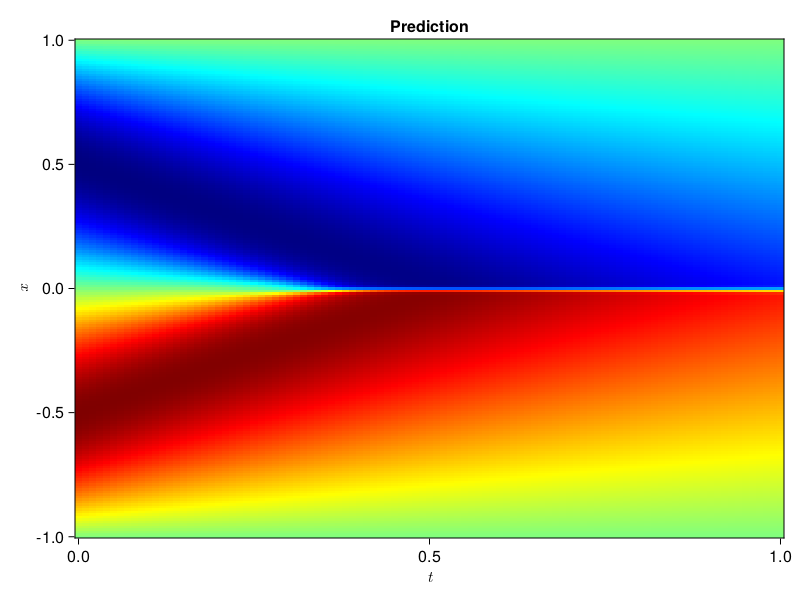

In [8]:
using CairoMakie, MakiePublication

phi = pinn.phi
ts, xs = [infimum(d.domain):0.01:supremum(d.domain) for d in pde_system.domain]
axis = (xlabel=L"t", ylabel=L"x", title="Prediction")
u_pred = [sum(pinn.phi([t, x], res.u)) for t in ts, x in xs]
heatmap(ts, xs, u_pred, axis=axis; colormap=:jet)

In [24]:
using MAT
data = matread("burgers_shock.mat")

Dict{String, Any} with 3 entries:
  "t"    => [0.0; 0.01; … ; 0.98; 0.99;;]
  "x"    => [-1.0; -0.992157; … ; 0.992157; 1.0;;]
  "usol" => [1.22465e-16 2.95362e-17 … 2.61833e-16 9.39537e-17; 0.0246374 0.023…

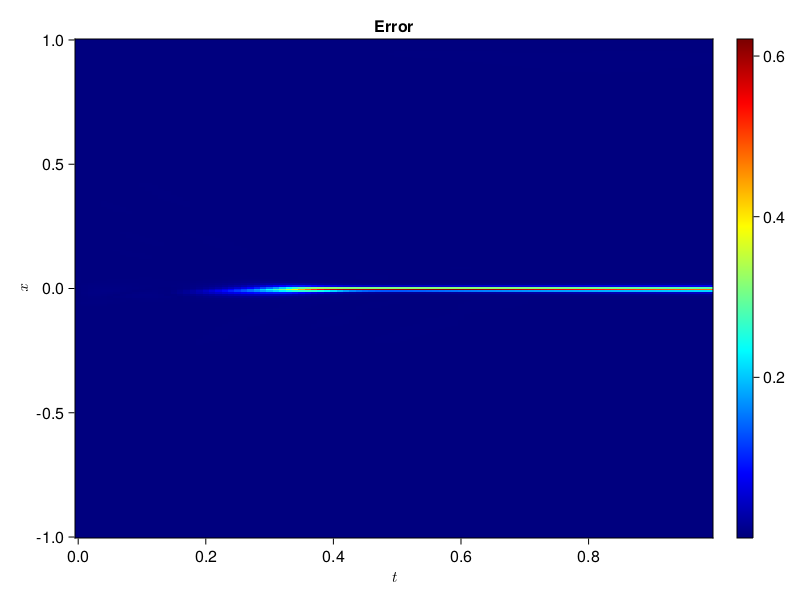

In [35]:
usol = data["usol"]

# Grid
t_star = vec(data["t"])
x_star = vec(data["x"])

u_pred = [sum(pinn.phi([t, x], res.u)) for t in t_star, x in x_star]
fig, ax, hm = heatmap(t_star, x_star, abs.(usol' - u_pred);
                      axis=(xlabel=L"t", ylabel=L"x", title="Error"), colormap=:jet)
Colorbar(fig[:, end + 1], hm)
fig

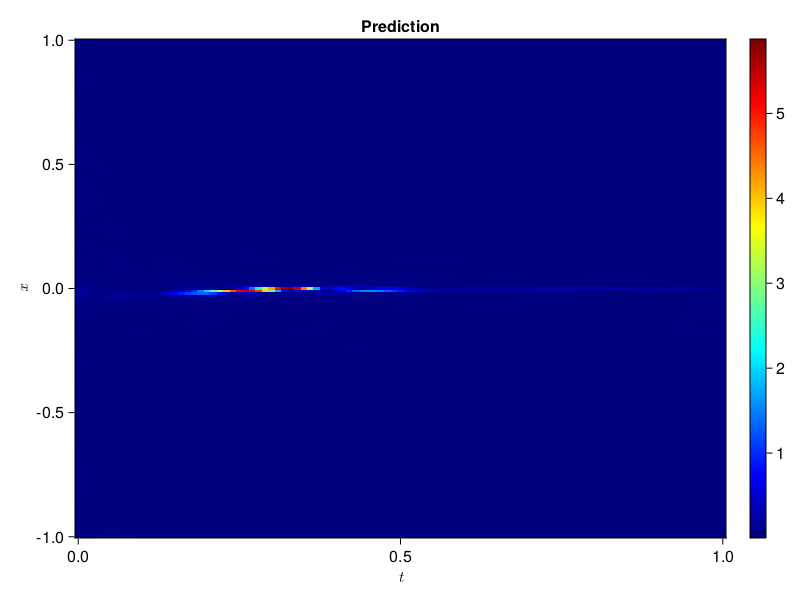

In [44]:
residual = [sum(abs, Sophon.residual_function_1([t, x], res.u)) for t in ts, x in xs]

fig, ax, hm = heatmap(ts, xs, residual, axis=axis, colormap=:jet)
Colorbar(fig[:, end + 1], hm)
fig